# Holocene Ice Analysis

### Introduction

The purpose of this notebook is to analyze the dynamics of the climate over the course of the Holocene at either end of the globe using ice core records from Greenland and Antarctica. Proxies for temperature will be used wherever possible in the form of oxygen isotope data (preferred) or hydrogen isotope data. Inferred temperature will be used if no other options are available.

In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import ammonyte as amt
import seaborn as sns
import pandas as pd
import matplotlib.transforms as transforms

In [2]:
color_list = sns.color_palette('colorblind')

In [3]:
data_folder = './data/8k_ice'

In [4]:
data = pyleo.Lipd(data_folder)

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 8 LiPD file(s)
reading: GRIP.Vinther.2006.lpd
reading: Renland.Johnsen.1992.lpd
reading: EDML.Stenni.2010.lpd
reading: EPICADomeC.Stenni.2010.lpd
reading: Vostok.Vimeux.2002.lpd
reading: GISP2.Grootes.1997.lpd
reading: NGRIP.NGRIP.2004.lpd
reading: TALDICE.Mezgec.2017.lpd
Finished read: 8 records


/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_19892/1817828534.py:1: DeprecationWarning: The Lipd class is being deprecated and will be removed in Pyleoclim v1.0.0. Functionalities will instead be handled by the pyLipd package.
  data = pyleo.Lipd(data_folder)


In [5]:
lipd_series_list = data.to_LipdSeriesList()

extracting paleoData...
extracting: GRIP.Vinther.2006
extracting: Renland.Johnsen.1992
extracting: EDML.Stenni.2010
extracting: EPICADomeC.Stenni.2010
extracting: Vostok.Vimeux.2002
extracting: GISP2.Grootes.1997
extracting: NGRIP.NGRIP.2004
extracting: TALDICE.Mezgec.2017
Created time series: 39 entries
Both age and year information are available, using age
Both age and year information are available, using age
Both age and year information are available, using age


In [6]:
lipd_series_dict = {}

for series in lipd_series_list:
    ms_series = series.copy()
    print(f'{ms_series.label} : {ms_series.value_name}')
    if ms_series.label not in lipd_series_dict:
        lipd_series_dict[ms_series.label] = []
        lipd_series_dict[ms_series.label].append(series)
    else:
        lipd_series_dict[ms_series.label].append(ms_series)

GRIP.Vinther.2006 : depth
GRIP.Vinther.2006 : age
GRIP.Vinther.2006 : d18O
Renland.Johnsen.1992 : depth
Renland.Johnsen.1992 : age
Renland.Johnsen.1992 : d18O
EDML.Stenni.2010 : bagDepth
EDML.Stenni.2010 : age
EDML.Stenni.2010 : bagd18O
EDML.Stenni.2010 : bagdD
EDML.Stenni.2010 : bagDexcess
EDML.Stenni.2010 : temperature
EDML.Stenni.2010 : tempSource
EDML.Stenni.2010 : tempNoElevCorrection
EDML.Stenni.2010 : tempNoSourceCorrection
EPICADomeC.Stenni.2010 : depth
EPICADomeC.Stenni.2010 : age
EPICADomeC.Stenni.2010 : temperature
EPICADomeC.Stenni.2010 : tempSource
EPICADomeC.Stenni.2010 : tempPartialCorrect
EPICADomeC.Stenni.2010 : bagd18O
EPICADomeC.Stenni.2010 : bagdD
EPICADomeC.Stenni.2010 : bagDexcess
Vostok.Vimeux.2002 : age
Vostok.Vimeux.2002 : d-excess
Vostok.Vimeux.2002 : d2H
Vostok.Vimeux.2002 : temperature
Vostok.Vimeux.2002 : Tsource
GISP2.Grootes.1997 : Depth
GISP2.Grootes.1997 : d18O
GISP2.Grootes.1997 : age
NGRIP.NGRIP.2004 : d18O
NGRIP.NGRIP.2004 : year
NGRIP.NGRIP.2004 : a

In [7]:
index_dict = {
    'GRIP.Vinther.2006' : 2,
    'Renland.Johnsen.1992' : 2,
    'EDML.Stenni.2010' : 2,
    'EPICADomeC.Stenni.2010' : 5,
    'Vostok.Vimeux.2002' : 2,
    'GISP2.Grootes.1997' : 1,
    'NGRIP.NGRIP.2004' : 0,
    'DomeF.Uemura.2018' : 4,
    'TALDICE.Mezgec.2017' : 3,
    'WAISDivide.Cuffey.2016' : 1
}

In [8]:
lipd_series_dict.keys()

dict_keys(['GRIP.Vinther.2006', 'Renland.Johnsen.1992', 'EDML.Stenni.2010', 'EPICADomeC.Stenni.2010', 'Vostok.Vimeux.2002', 'GISP2.Grootes.1997', 'NGRIP.NGRIP.2004', 'TALDICE.Mezgec.2017'])

In [9]:
greenland_ms_list = []
antarctica_ms_list = []
count = 0

for label in list(lipd_series_dict.keys()):
    index = index_dict[label]
    for idx,series in enumerate(lipd_series_dict[label]):
        if idx == index:
            if series.lipd_ts['geo_meanLat'] > 0:
                series.time_unit = 'Years BP'
                greenland_ms_list.append(series)
            else:
                series.time_unit = 'Years BP'
                antarctica_ms_list.append(series)
        

In [10]:
end_time = 10000

Greenland analysis

(<Figure size 640x480 with 5 Axes>,
 {0: <Axes: ylabel='d18O [permil]'>,
  1: <Axes: ylabel='d18O [permil]'>,
  2: <Axes: ylabel='d18O [permil]'>,
  3: <Axes: ylabel='d18O [permil]'>,
  4: <Axes: xlabel='Age [Years BP]'>})

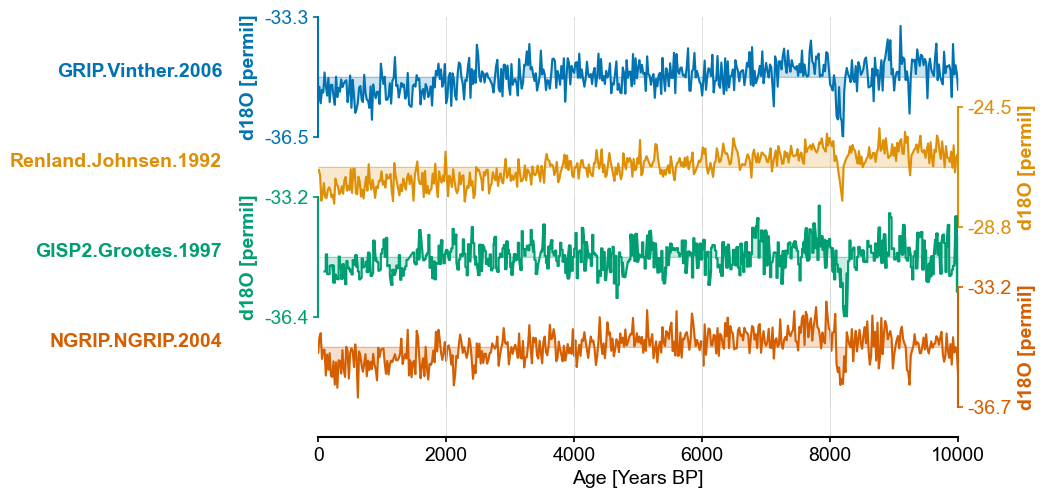

In [11]:
greenland_ms = pyleo.MultipleSeries([series.slice((0,end_time)) for series in greenland_ms_list])
greenland_ms.stackplot(colors=color_list[:len(greenland_ms.series_list)])

In [12]:
greenland_lp = []
m = 12
tau = 4

for series in greenland_ms.series_list:
    amt_series = amt.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    ).convert_time_unit('Years')
    td = amt_series.embed(m=m,tau=tau)
    eps = td.find_epsilon(1)
    rm = eps['Output']
    lp = rm.laplacian_eigenmaps(w_size=20,w_incre=4).convert_time_unit('Years BP')
    greenland_lp.append(lp)

Initial density is 0.0180
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0180
Epsilon: 1.1601, Density: 0.0583
Epsilon: 1.1601, Density: 0.0583.
Initial density is 0.0155
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0155
Epsilon: 1.1727, Density: 0.0436
Epsilon: 1.1727, Density: 0.0436.
Initial density is 0.0129
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0129
Epsilon: 1.1856, Density: 0.0472
Epsilon: 1.1856, Density: 0.0472.
Initial density is 0.0116
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0116
Epsilon: 1.1918, Density: 0.0408
Epsilon: 1.1918, Density: 0.0408.


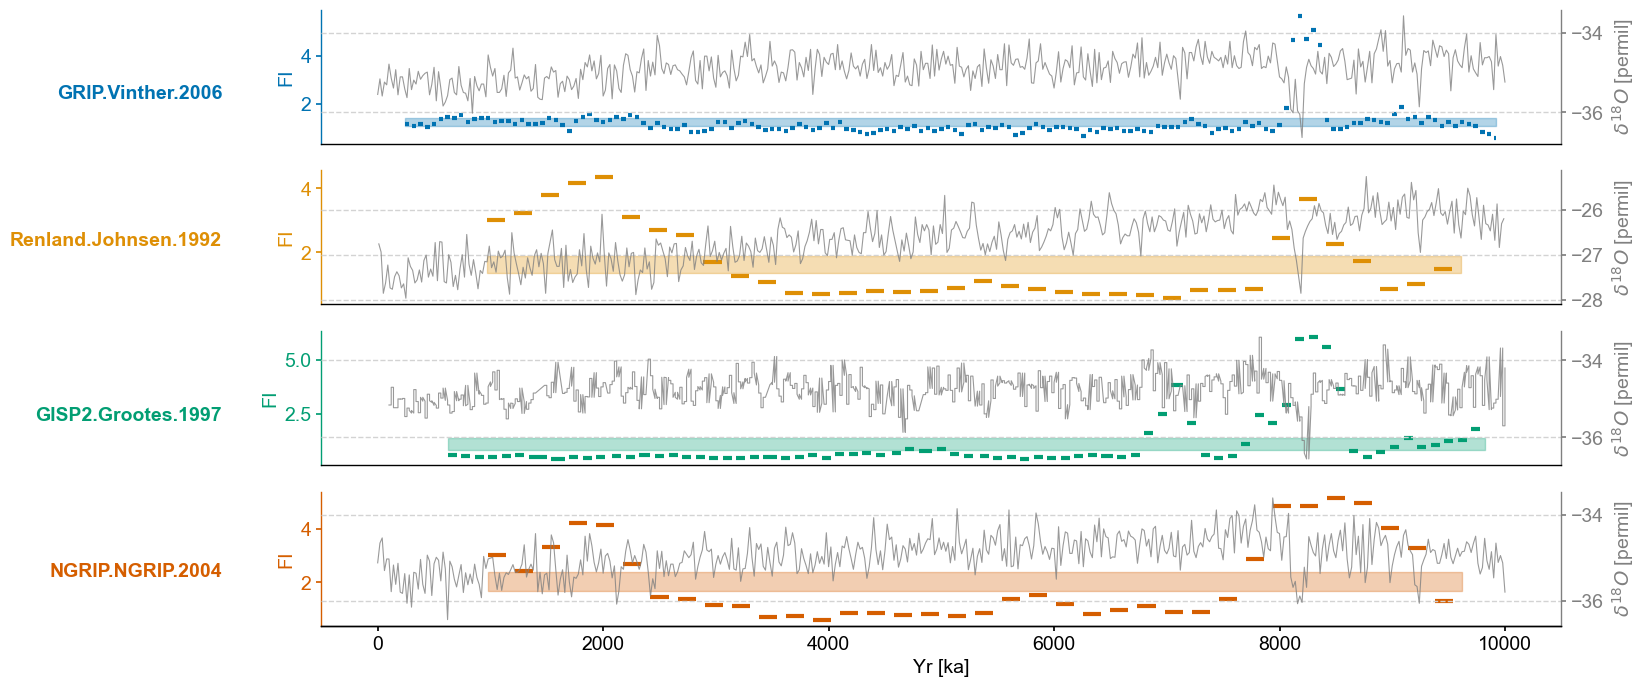

In [13]:
ms = greenland_ms
lp_series_list = greenland_lp

fig,axes = plt.subplots(nrows=len(lp_series_list),ncols=1,sharex=True,figsize=(16,8))
transition_timing = []

for idx,lp_series in enumerate(lp_series_list):
    ts = lp_series
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'
    
    ax = axes[idx]
    
    ts_smooth = amt.utils.fisher.smooth_series(ts,3)
    upper, lower = amt.utils.sampling.confidence_interval(ts)

    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx].slice((0,end_time)),
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.2, s = ts.label, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold')
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(lp_series_list)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)



Antarctica analysis

(<Figure size 640x480 with 5 Axes>,
 {0: <Axes: ylabel='bagd18O [permil]'>,
  1: <Axes: ylabel='bagd18O [permil]'>,
  2: <Axes: ylabel='d2H [BP]'>,
  3: <Axes: ylabel='d18O [permil]'>,
  4: <Axes: xlabel='Age [Years BP]'>})

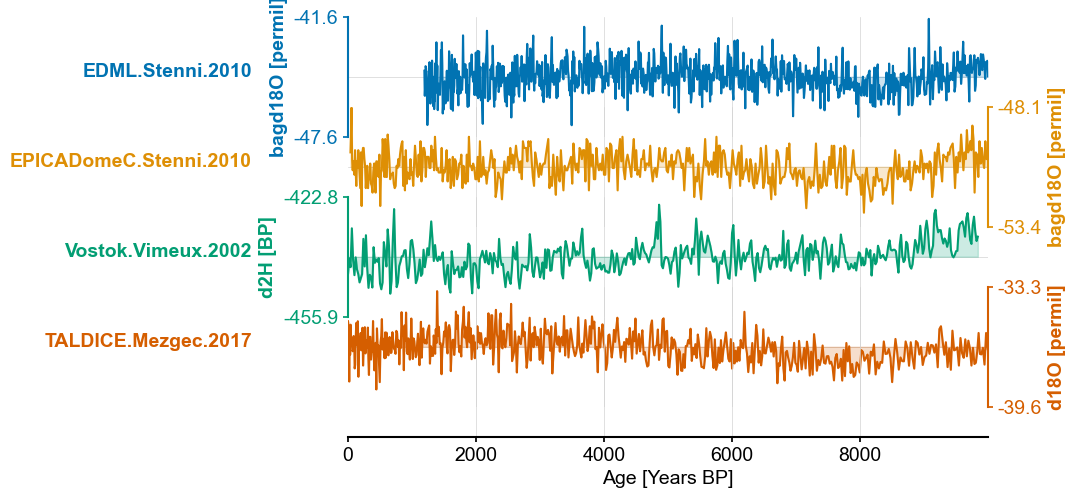

In [14]:
antarctica_ms = pyleo.MultipleSeries([series.slice((0,end_time)) for series in antarctica_ms_list])
antarctica_ms.stackplot(colors=color_list[:len(antarctica_ms.series_list)])

In [15]:
antarctica_lp = []
m = 12
tau = 3
eps_list= [2.2,2.2,10,2.2]

for idx,raw_series in enumerate(antarctica_ms.series_list):
    
    if not raw_series.is_evenly_spaced:
        series = raw_series.interp()
    else:
        series = raw_series
        
    amt_series = amt.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    ).convert_time_unit('Years')
    td = amt_series.embed(m=m,tau=tau)
    eps = td.find_epsilon(eps_list[idx])
    rm = eps['Output']
    lp = rm.laplacian_eigenmaps(w_size=20,w_incre=4).convert_time_unit('Years BP')
    antarctica_lp.append(lp)

Initial density is 0.0338
Initial density is not within the tolerance window, searching...
Epsilon: 2.3619, Density: 0.0569
Epsilon: 2.3619, Density: 0.0569.
Initial density is 0.0624
Initial density is not within the tolerance window, searching...
Epsilon: 2.0758, Density: 0.0396
Epsilon: 2.1796, Density: 0.0586
Epsilon: 2.1796, Density: 0.0586.
Initial density is 0.0256
Initial density is not within the tolerance window, searching...
Epsilon: 10.2436, Density: 0.0301
Epsilon: 10.4430, Density: 0.0338
Epsilon: 10.6050, Density: 0.0370
Epsilon: 10.7349, Density: 0.0397
Epsilon: 10.8380, Density: 0.0420
Epsilon: 10.8380, Density: 0.0420.
Initial density is 0.0239
Initial density is not within the tolerance window, searching...
Epsilon: 2.4612, Density: 0.0550
Epsilon: 2.4612, Density: 0.0550.


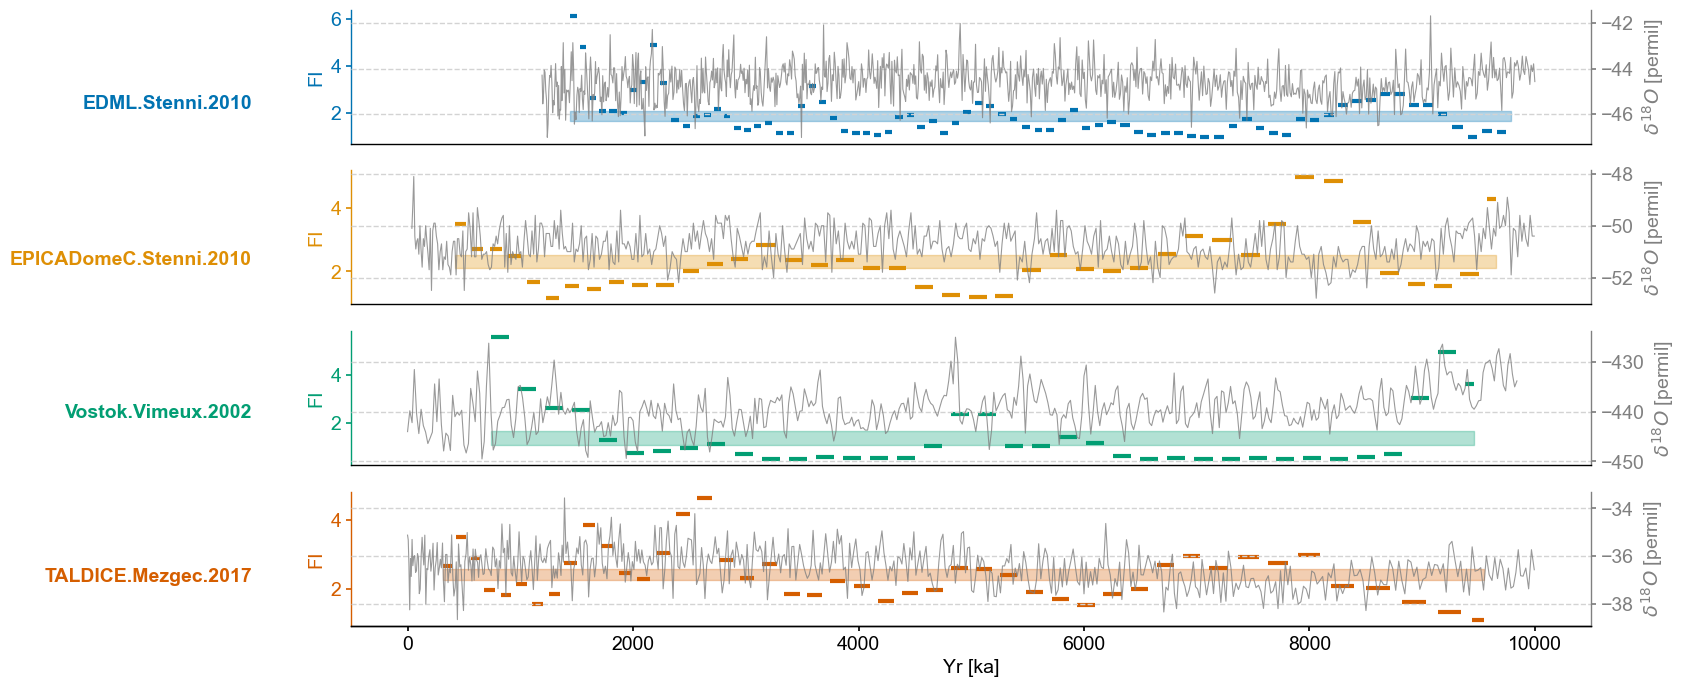

In [16]:
ms = antarctica_ms
lp_series_list = antarctica_lp

fig,axes = plt.subplots(nrows=len(lp_series_list),ncols=1,sharex=True,figsize=(16,8))
transition_timing = []

for idx,lp_series in enumerate(lp_series_list):
    ts = lp_series
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'
    
    ax = axes[idx]
    
    ts_smooth = amt.utils.fisher.smooth_series(ts,3)
    upper, lower = amt.utils.sampling.confidence_interval(ts)
    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx].slice((0,end_time)),
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.2, s = ts.label, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold')
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(lp_series_list)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
